In [1]:
%load_ext autoreload
%autoreload 2


>> Import required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
import datetime
import seaborn as sns
from scipy.stats import chi2_contingency, beta
import plotly.graph_objs as go


>> Importing required modules

In [3]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from plot import Plot

>> Initialize plot class

In [4]:
pl = Plot()

>> Ignore warnings

In [5]:
import warnings
warnings.filterwarnings('ignore')


>> Loading the Data

In [6]:
df = pd.read_csv('../data/ABtwoCampaignEngView.csv')

>> #### Explore the data and identify the features

In [8]:
# Data overview
df.head()
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [17]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,8ec30aff-2332-4a1f-9330-b93abb32bc94,control,<built-in method date of Timestamp object at 0...,15,LG,156,6,0.0,0.0
1,4e1bcb56-357c-4186-9d39-3be82e3519f1,control,<built-in method date of Timestamp object at 0...,7,Samsung,162,6,0.0,0.0
2,dd6ec327-fcfd-4a80-89c0-dccd3dd80f09,control,<built-in method date of Timestamp object at 0...,14,Apple,178,15,0.0,0.0
3,b5222d0f-39e3-4c02-a12f-1ef09d4f861f,control,<built-in method date of Timestamp object at 0...,22,Apple,167,15,0.0,0.0
4,9428377d-1504-4407-87c2-ce518f67eb87,control,<built-in method date of Timestamp object at 0...,21,Samsung,155,15,0.0,0.0


In [9]:
# data distribution
df.describe()

,hour,platform_os,browser,yes,no
count,912712.000000,912712.000000,912712.000000,912712.000000,912712.000000
mean,10.648142,127.813321,8.211051,0.101645,0.019499
std,7.372631,32.217674,3.536780,0.302182,0.138271
min,0.000000,101.000000,1.000000,0.000000,0.000000
25%,4.000000,101.000000,6.000000,0.000000,0.000000
50%,10.000000,101.000000,7.000000,0.000000,0.000000
75%,17.000000,162.000000,7.000000,0.000000,0.000000
max,23.000000,181.000000,15.000000,1.000000,1.000000


In [10]:
#data properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912712 entries, 0 to 912711
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   auction_id   912712 non-null  object 
 1   experiment   912712 non-null  object 
 2   date         912712 non-null  object 
 3   hour         912712 non-null  int64  
 4   device_make  912712 non-null  object 
 5   platform_os  912712 non-null  int64  
 6   browser      912712 non-null  int64  
 7   yes          912712 non-null  float64
 8   no           912712 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 62.7+ MB


In [11]:
df.columns

Index(['auction_id', 'experiment', 'date', 'hour', 'device_make',
       'platform_os', 'browser', 'yes', 'no'],
      dtype='object')

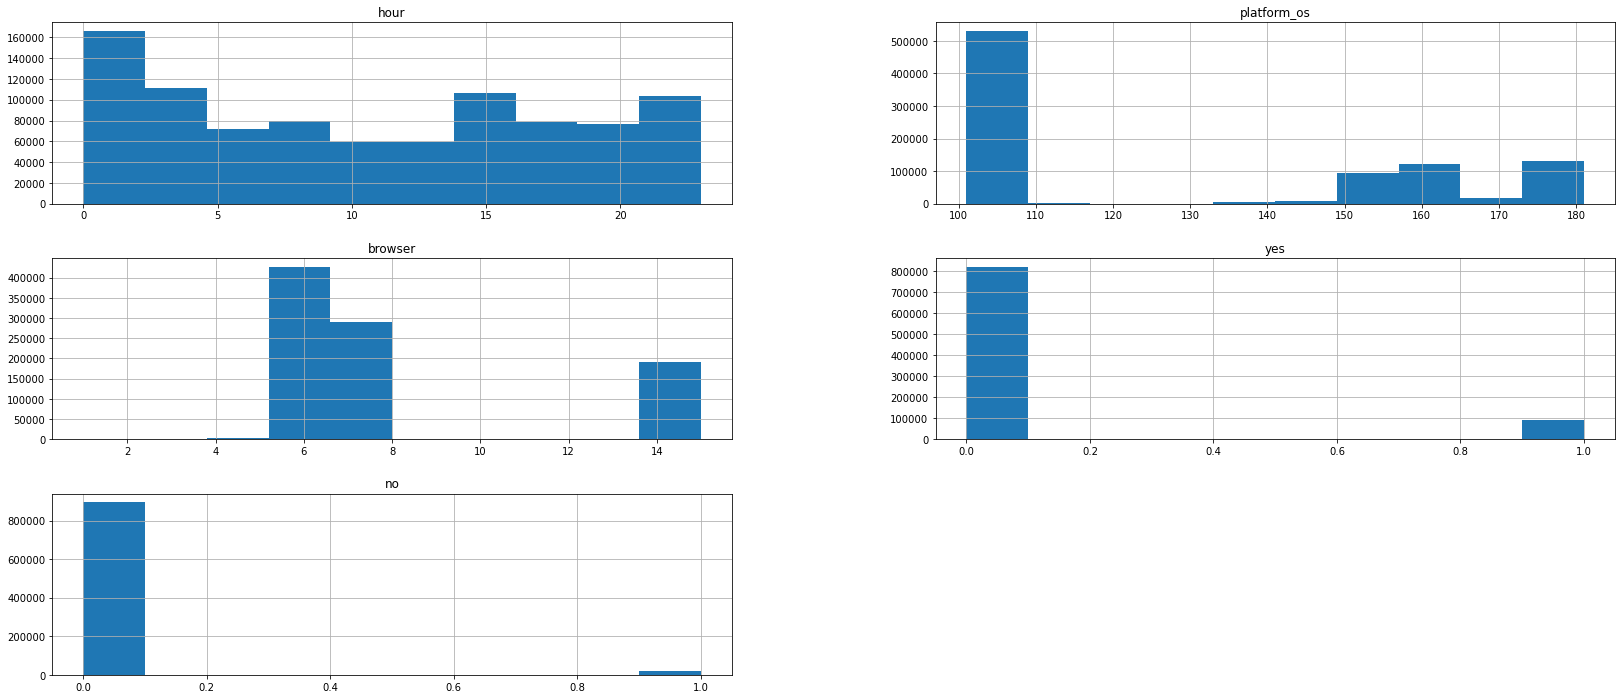

In [12]:
# Visualize the data (overall distribution)
df.hist(bins=10, figsize=(28,12))
plt.show()

In [13]:
# Number of people who have completed the survey with a yes and no
print(df[(df['experiment'] == 'exposed') & (df['yes'] == 1)].shape[0])
print(df[(df['experiment'] == 'exposed') & (df['no'] == 1)].shape[0])

82132
9539


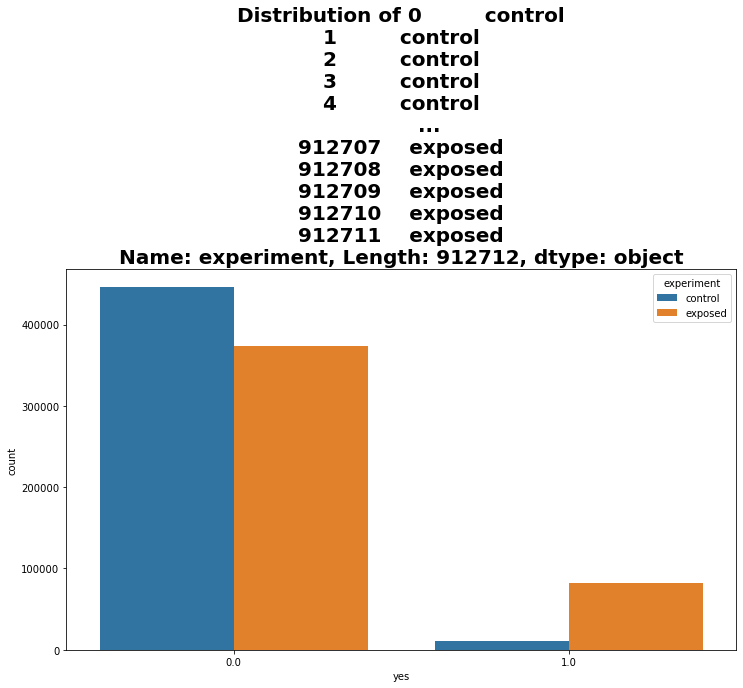

In [14]:
pl.plot_count(df.yes, df.experiment)

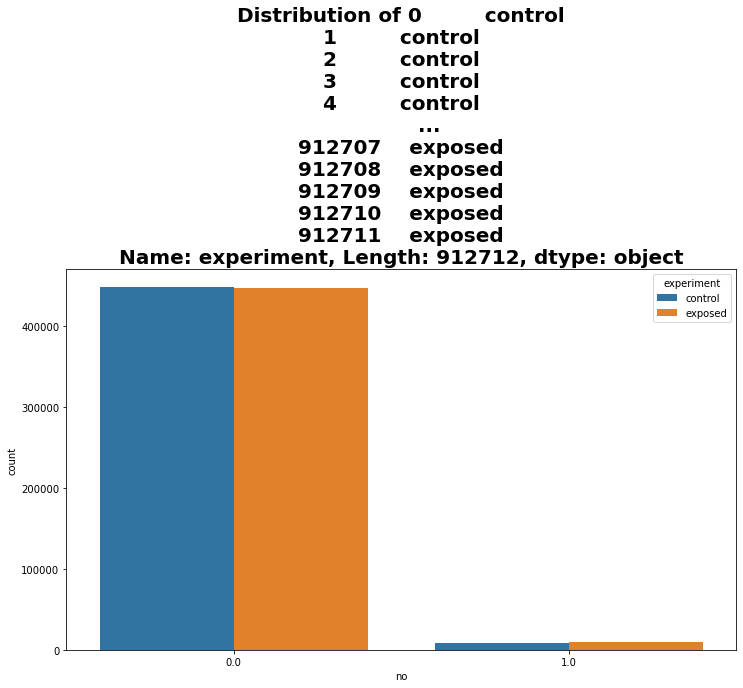

In [15]:
pl.plot_count(df.no, df.experiment)

In [ ]:
start_date = datetime.datetime.strptime(df['date'].min(), '%Y-%m-%d')
end_date = datetime.datetime.strptime(df['date'].max(), '%Y-%m-%d')
date_duration = (end_date - start_date).days


print(f"Number of unique users in the experiement: {df['auction_id'].nunique()}")
print(f"Data collected for {date_duration} days")
print(f"Percentage of users in control group: {round(df[df['experiment'] == 'control']['auction_id'].nunique() / df['auction_id'].nunique() * 100, 2)}%")
print(f"Percentage of users in exposed group: {round(df[df['experiment'] == 'exposed']['auction_id'].nunique() / df['auction_id'].nunique() * 100, 2)}%")
# print(f"Percentage of users who have clicked on the link: {round(df['yes'].sum()/df['yes'].count()*100, 2)}%")



In [18]:
# Divide into participated and non-participated
participated_df = df[~((df['yes']== 0) & (df['no']== 0))]
nparticipated_df =  df[(df['yes']== 0) & (df['no']== 0)]

In [19]:
print(f"{participated_df.shape[0]} participants participated")
print(f"{nparticipated_df.shape[0]} participants did not participate")

110570 participants participated
802142 participants did not participate


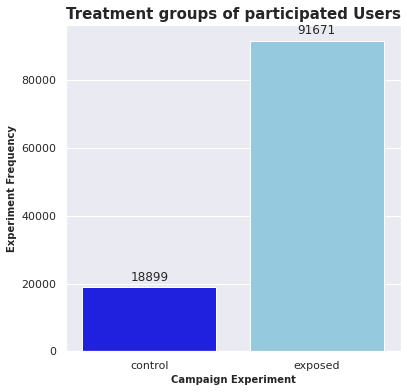

In [20]:
#seaborn countplot to show the ad campaign experiment
plt.figure(figsize=(6,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="experiment", palette=["blue", "skyblue"], data=participated_df)

#getting the values of the data
pl.get_value(ax)

#set the figure paremeters
pl.fig_att(ax, "Treatment groups of participated Users", 
        "Campaign Experiment", "Experiment Frequency", 15, 10, "bold")

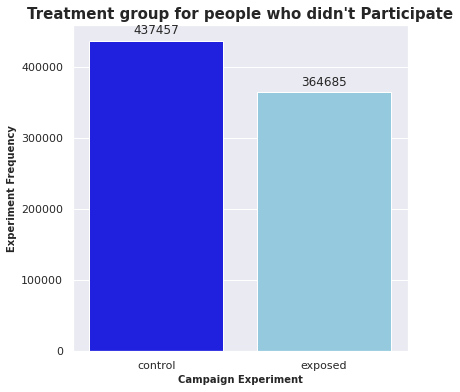

In [21]:
#seaborn countplot to show the ad campaign experiment
plt.figure(figsize=(6,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="experiment", palette=["blue", "skyblue"], data=nparticipated_df)
#getting the values of the data
pl.get_value(ax)

#set the figure paremeters
pl.fig_att(ax, "Treatment group for people who didn't Participate", 
        "Campaign Experiment", "Experiment Frequency", 15, 10, "bold")

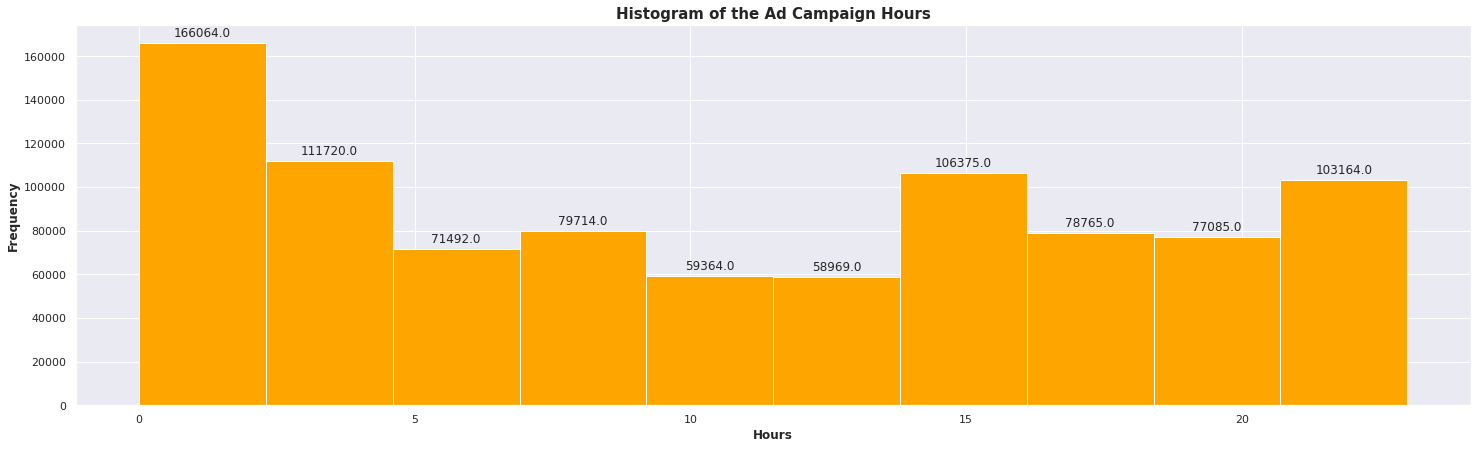

In [22]:
# time distribution for the AD campaign
hour_plot = df.hour.plot(kind='hist', color='orange', figsize=(25,7))

#getting the values of the data
pl.get_value(hour_plot)

#set the figure parameters
pl.fig_att(hour_plot, 'Histogram of the Ad Campaign Hours', 
        'Hours', 'Frequency', 15, 12, 'bold')

>> ##### Time distribution for the AD campaign for those who did not participate


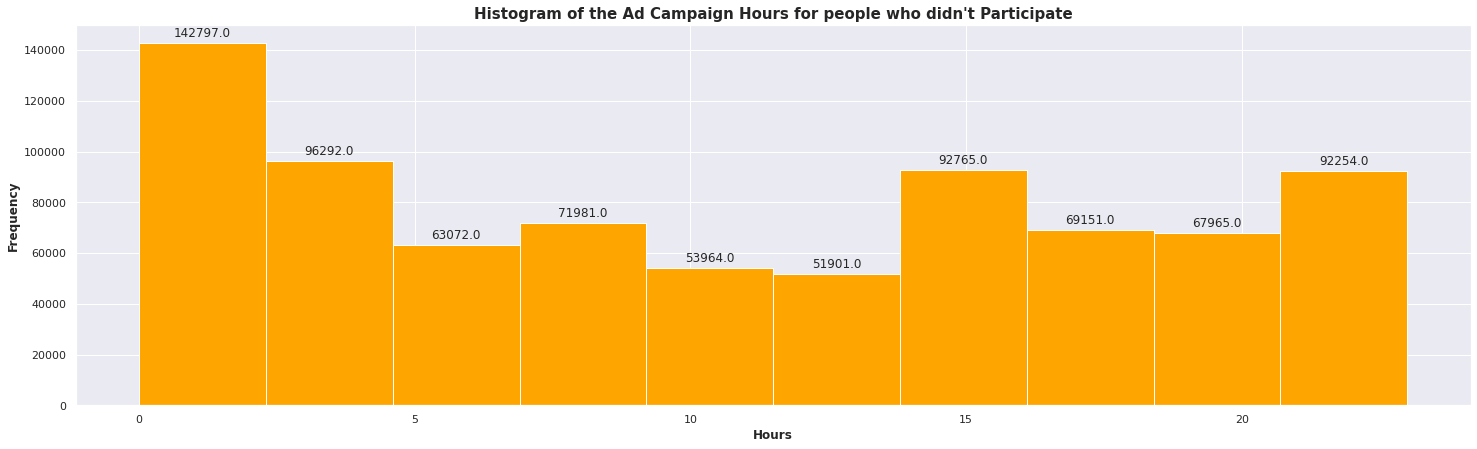

In [23]:
hour_plot = nparticipated_df.hour.plot(kind='hist', color='orange', figsize=(25,7))

#getting the values of the data
pl.get_value(hour_plot)

#set the figure parameters
pl.fig_att(hour_plot, 'Histogram of the Ad Campaign Hours for people who didn\'t Participate', 
        'Hours', 'Frequency', 15, 12, 'bold')

>> #### Time distribution for the AD campaign for those who participated

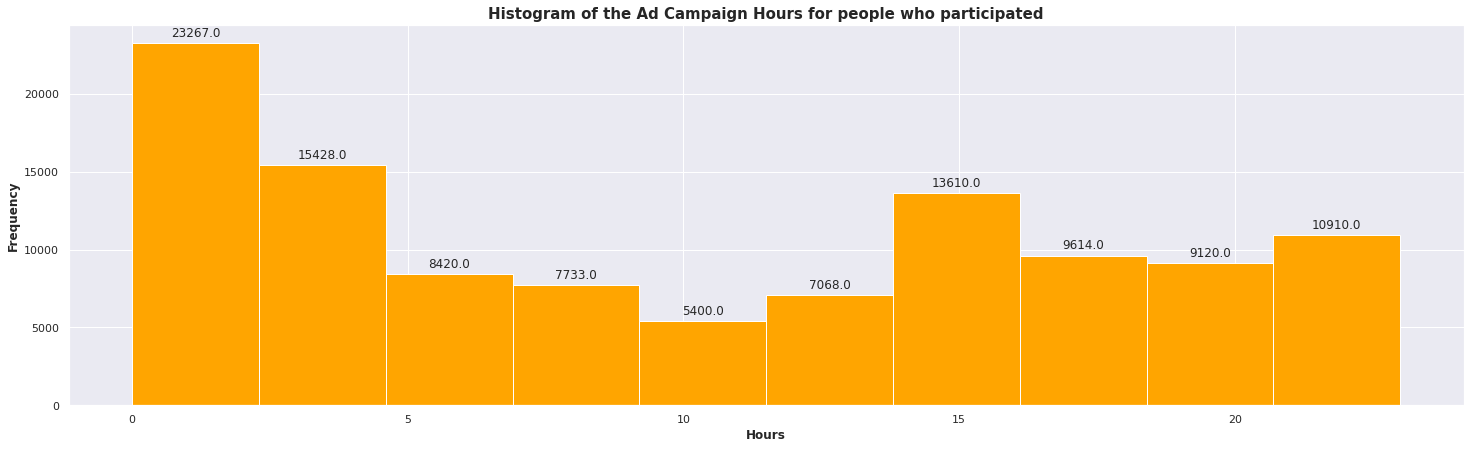

In [24]:
hour_plot = participated_df.hour.plot(kind='hist', color='orange', figsize=(25,7))

#getting the values of the data
pl.get_value(hour_plot)

#set the figure parameters
pl.fig_att(hour_plot, 'Histogram of the Ad Campaign Hours for people who participated', 
        'Hours', 'Frequency', 15, 12, 'bold')

Time distribution for the AD campaign is similar for those who did not participate and those who participated.

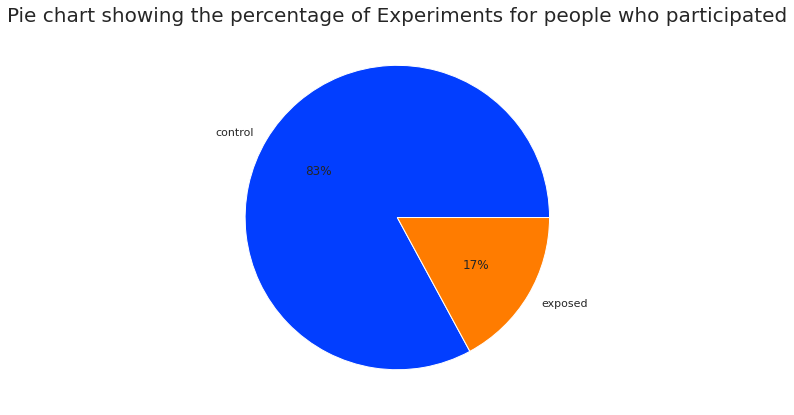

In [25]:
#pie chart showing the prcentage of the experiment carried out
pl.plot_pie(participated_df[['experiment']].value_counts(), ['control','exposed'], "Pie chart showing the percentage of Experiments for people who participated")

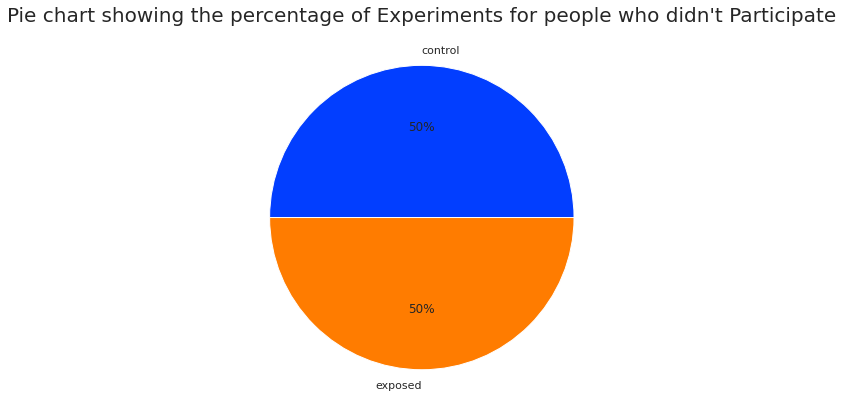

In [26]:
pl.plot_pie(nparticipated_df[['experiment']].value_counts().value_counts(), ['control','exposed'], "Pie chart showing the percentage of Experiments for people who didn't Participate")

In [ ]:
# # Date distribution for the AD
# plt.figure(figsize=(20,10))
# sns.set(style="darkgrid")

# #countplot
# ax = sns.countplot(x="date", palette='deep', data=participated_df, hue='yes', )

# #getting the values of the data
# pl.get_value(ax)

# #set the figure paremeters
# pl.fig_att(ax, "Date distribution for participated Users", 
#         "Date", "Frequency", 25, 20, "bold")

Date distribution of the AD campaign for thos who did not participate

In [28]:
# # Date distribution for the AD
# plt.figure(figsize=(20,10))
# sns.set(style="darkgrid")

# #countplot
# ax = sns.countplot(x="date", palette='deep', data=nparticipated_df )

# #getting the values of the data
# pl.get_value(ax)

# #set the figure paremeters
# pl.fig_att(ax, "Date distribution for people who didn't Participate", 
#         "Date", "Frequency", 25, 20, "bold")

Date distribution of the AD campaign for thos who participated based on treatment grouo

In [29]:
# #seaborn countplot to show the Ad campaign dates
# plt.figure(figsize=(20,10))
# sns.set(style="darkgrid")

# #countplot
# ax = sns.countplot(x="date", palette='deep', data=participated_df, hue='experiment', )

# #getting the values of the data
# pl.get_value(ax)

# #set the figure paremeters
# pl.fig_att(ax, "Date distribution for participated users by experiment", 
#         "Date", "Frequency", 25, 20, "bold")


It can be seen that most of the reponse is on 03/07/2020 and most of them said no on each day.

In [30]:
df['platform_os'].value_counts()

101    529469
162    118039
178     77651
156     48979
155     39381
        ...  
130         1
118         1
106         1
134         1
181         1
Name: platform_os, Length: 68, dtype: int64

In [28]:
participated_df['platform_os'].value_counts()

6    1226
5      17
Name: platform_os, dtype: int64

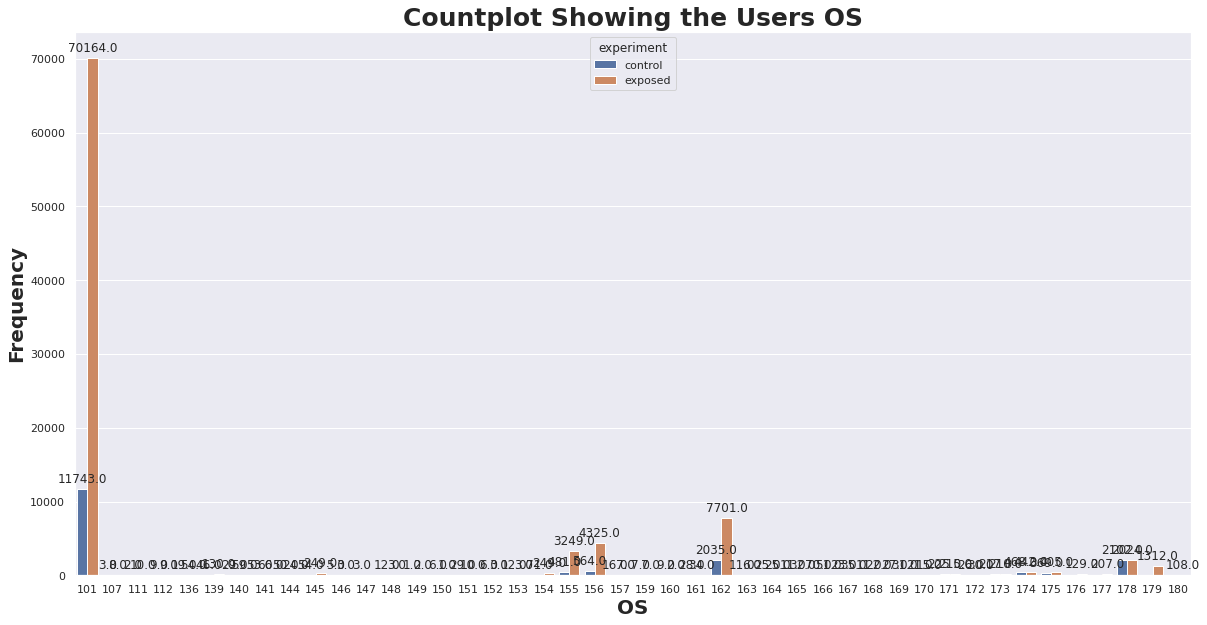

In [31]:
#seaborn countplot to show the Ad campaign dates
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")

#countplot
ax = sns.countplot(x="platform_os", palette='deep', data=participated_df, hue='experiment', )

#getting the values of the data
pl.get_value(ax)

#set the figure paremeters
pl.fig_att(ax, "Countplot Showing the Users OS", 
        "OS", "Frequency", 25, 20, "bold")

One of the OS is not represented among the participant,



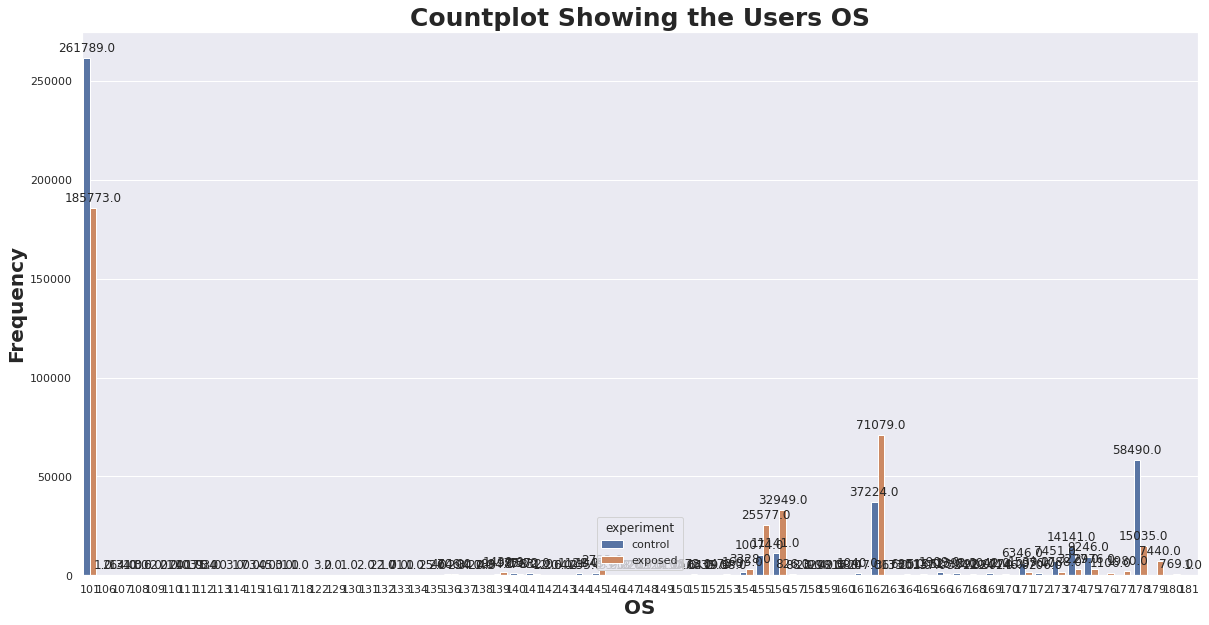

In [32]:
#seaborn countplot to show the Ad campaign dates
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")

#countplot
ax = sns.countplot(x="platform_os", palette='deep', data=nparticipated_df, hue='experiment', )

#getting the values of the data
pl.get_value(ax)

#set the figure paremeters
pl.fig_att(ax, "Countplot Showing the Users OS", 
        "OS", "Frequency", 25, 20, "bold")

Plot showing participant and non participant Operating System distribution¶


In [33]:
# Browser list for all users
df['browser'].value_counts()

6     427413
7     289305
15    191935
5       2715
12       870
1        310
8        153
14         7
10         4
Name: browser, dtype: int64

In [34]:
# Browser list for participated users
participated_df['browser'].value_counts()

6     72954
15    22489
7     14979
5        86
12       38
1        14
8        10
Name: browser, dtype: int64

In [35]:
# Browser list for users
participated_df['browser'].value_counts()

6     72954
15    22489
7     14979
5        86
12       38
1        14
8        10
Name: browser, dtype: int64

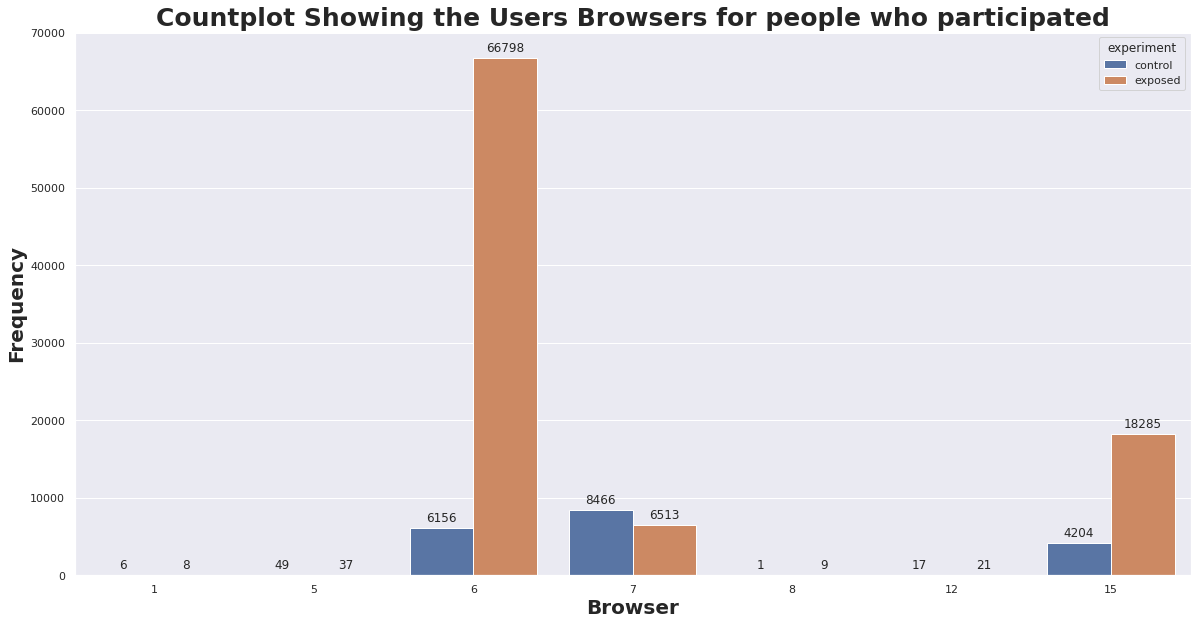

In [36]:
#seaborn countplot to show the Ad campaign dates
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")

#countplot
ax = sns.countplot(x="browser", palette='deep', data=participated_df, hue='experiment', )

#getting the values of the data
pl.get_value(ax)

#set the figure paremeters
pl.fig_att(ax, "Countplot Showing the Users Browsers for people who participated", 
        "Browser", "Frequency", 25, 20, "bold")

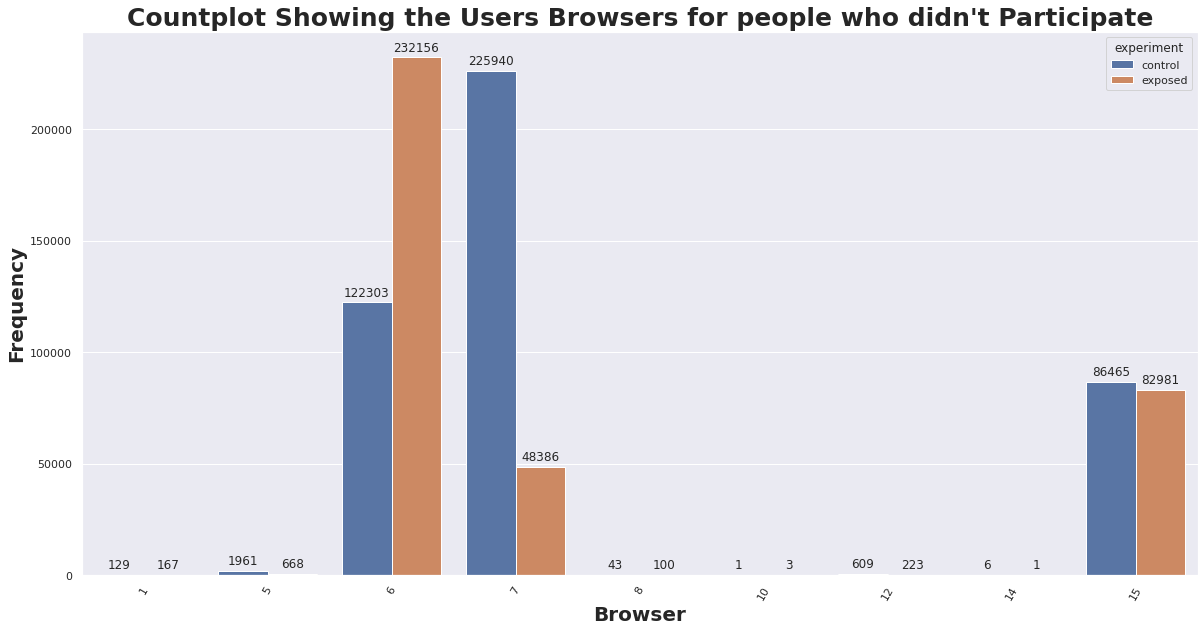

In [37]:
#seaborn countplot to show the Ad campaign dates
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")

#countplot
ax = sns.countplot(x="browser", palette='deep', data=nparticipated_df, hue='experiment', )

#getting the values of the data
pl.get_value(ax)

#set the figure paremeters
pl.fig_att(ax, "Countplot Showing the Users Browsers for people who didn't Participate", 
        "Browser", "Frequency", 25, 20, "bold")
pl.rotate(ax, 60)

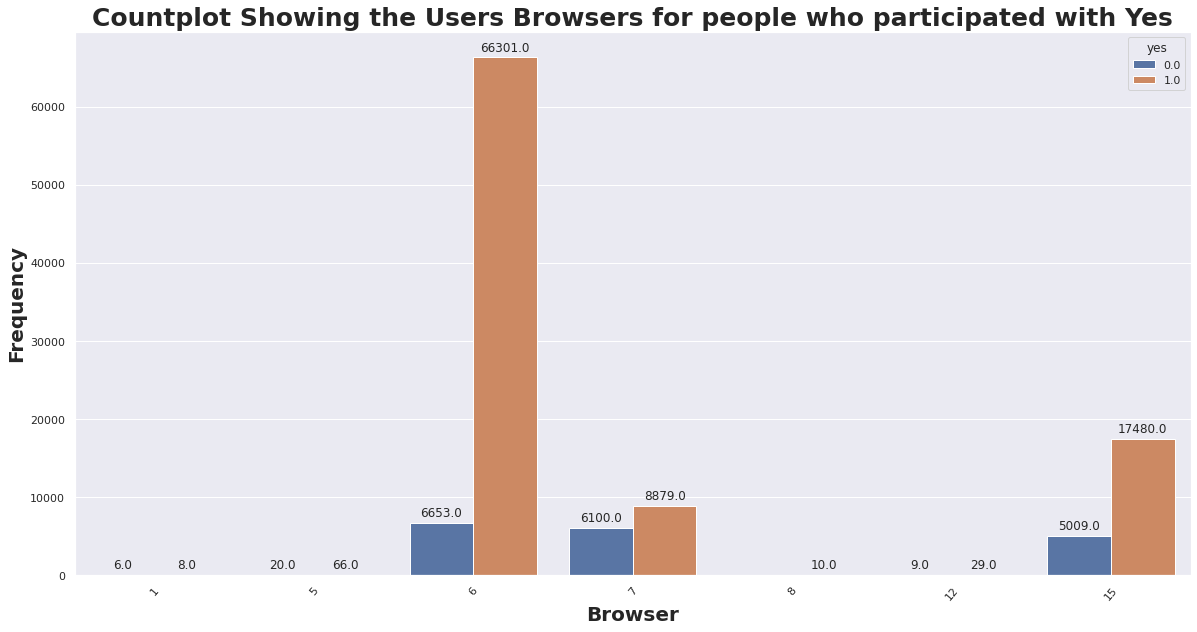

In [38]:
#seaborn countplot to show the Ad campaign dates
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")

#countplot
ax = sns.countplot(x="browser", palette='deep', data=participated_df, hue='yes', )

#getting the values of the data
pl.get_value(ax)

#set the figure paremeters
pl.fig_att(ax, "Countplot Showing the Users Browsers for people who participated with Yes", 
        "Browser", "Frequency", 25, 20, "bold")
pl.rotate(ax, 50)

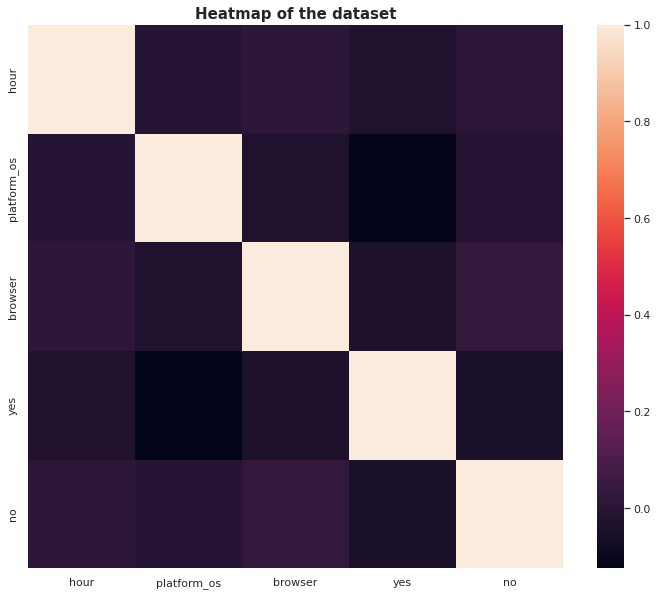

In [39]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr)
plt.title('Heatmap of the dataset', fontsize=15, fontweight='bold')
plt.show()

In [37]:
df[(df['experiment'] == 'control') & (df['yes'] == 1)].shape[0]

264

In [38]:
df[(df['experiment'] == 'control') & (df['no'] == 1)].shape[0]

322